                                car_name car_price_in_rupees kms_driven  \
0       Audi A3 35 TDI Premium + Sunroof        ₹ 24.75 Lakh  36,627 km   
1            Audi A3 35 TDI Premium Plus        ₹ 42.99 Lakh  15,678 km   
2  Audi A3 35 TDI Premium Plus + Sunroof         ₹ 29.5 Lakh  17,300 km   
3    Audi A3 35 TDI Technology + Sunroof         ₹ 30.5 Lakh  40,910 km   
4    Audi A3 35 TDI Technology + Sunroof         ₹ 16.5 Lakh  78,597 km   

  fuel_type       city  year_of_manufacture  
0    Diesel  Bangalore                 2016  
1    Diesel    Kolkata                 2019  
2    Diesel  Bangalore                 2018  
3    Diesel  Bangalore                 2020  
4    Diesel  Ahmedabad                 2014  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2012 non-null   object
 1   car_price_in_ru

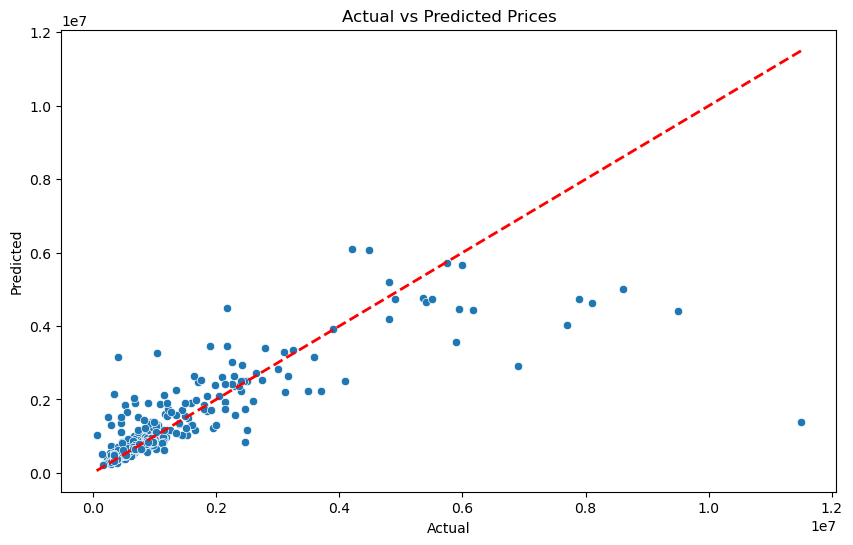

In [1]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

df = pd.read_csv('used_car_dataset2.csv')

# Display the first few rows and dataset information
print(df.head())
print(df.info())

# Convert 'car_price_in_rupees' to numerical values
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 1e5
        elif 'Crore' in price:
            return float(price.replace('Crore', '').strip()) * 1e7
        else:
            return float(price)
    except (ValueError, AttributeError):
        return np.nan

df['car_price_in_rupees'] = df['car_price_in_rupees'].apply(convert_price)

# Convert 'kms_driven' to numerical values
def convert_kms(kms):
    try:
        kms = str(kms).replace(' km', '').replace(',', '').strip()
        return int(kms)
    except (ValueError, AttributeError):
        return np.nan

df['kms_driven'] = df['kms_driven'].apply(convert_kms)

# Handle missing values and remove rows with NaNs in important columns
df = df.dropna(subset=['car_price_in_rupees', 'kms_driven'])

# Display the cleaned dataset information
print(df.head())
print(df.info())

# Label encode 'car_name', 'fuel_type', and 'city'
label_encoder = LabelEncoder()
df['car_name_encoded'] = label_encoder.fit_transform(df['car_name'])
df['fuel_type_encoded'] = label_encoder.fit_transform(df['fuel_type'])
df['city_encoded'] = label_encoder.fit_transform(df['city'])

# Identify numerical and encoded categorical columns
numerical_features = ['kms_driven', 'year_of_manufacture']
encoded_categorical_features = ['car_name_encoded', 'fuel_type_encoded', 'city_encoded']

# Combine all features for preprocessing
features = numerical_features + encoded_categorical_features

# Prepare X and y
X = df[features]
y = df['car_price_in_rupees']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection: RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training MSE: {train_mse}')
print(f'Training R2: {train_r2}')

# Evaluate on the testing set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Testing MSE: {test_mse}')
print(f'Testing R2: {test_r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()